In [79]:
# Load libraries
library(here)
library(ggplot2)
library(here)
library(rethinking)
library(data.table)
library(rstan)

# Load data and clean
d2<-read.csv(here("data","Ch2final2.csv"),row.names=1) # read data from csv
d2[d2$conceptPresent=="the Suffragettes",]$conceptPresent<-'The suffragettes' # Fix the capitalisation on suffragettes
d2[d2$valuePresent>=1,]$valuePresent <- 0.99999999 # Change value 1 and higher to be withn the bounds for beta distribution
d2[d2$valuePresent<=0,]$valuePresent <- 0.00000001 # Change value 0 and lower to be withn the bounds for beta distribution 
d2[d2$valuePast>=1,]$valuePast <- 0.99999999 # Change value 1 and higher to be withn the bounds for beta distribution
d2[d2$valuePast<=0,]$valuePast <- 0.00000001 # Change value 0 and lower to be withn the bounds for beta distribution 

In [80]:
# Load model and get precis
MS<-readRDS(here("models","simple.rds"))
PS<-precis(MS,depth=2,pars=c("beta"))

In [90]:
# Change the labels to be more informative:
cPast<-levels(as.factor(d2$conceptPresent))
labels<-gsub('[[:punct:]]',"",row.names(PS))
for (n in length(labels):1) labels<-gsub(as.character(n),paste(":",cPast[n],sep=""),labels)
row.names(PS)<-labels

In [91]:
# Get only the parametes we need:
d<-d2[d2$conceptPast!="the Fall of the Roman Empire",]
order<-c(unique(d[d$conceptPast==unique(d$conceptPast)[1],]$conceptPresent),unique(d[d$conceptPast==unique(d$conceptPast)[2],]$conceptPresent),
  unique(d[d$conceptPast==unique(d$conceptPast)[3],]$conceptPresent),unique(d[d$conceptPast==unique(d$conceptPast)[4],]$conceptPresent))

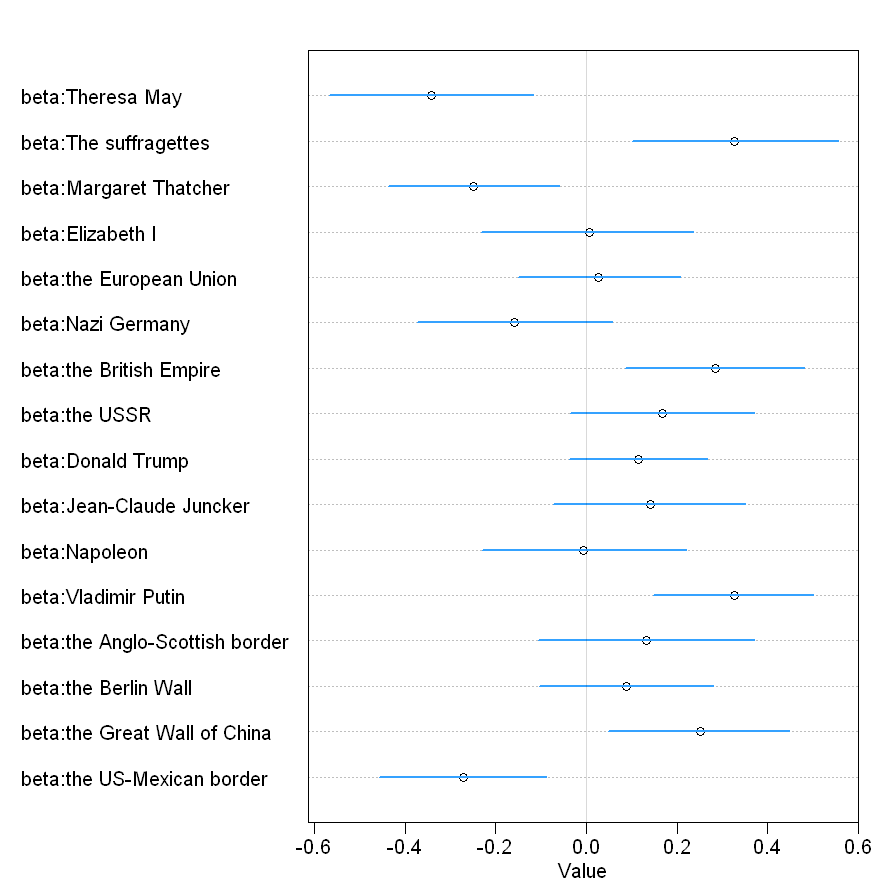

In [93]:
# Plot the parameters in right order
options(repr.plot.width = 7.38, repr.plot.height = 7.38,unit=cm,res=300)
#png(here("Figures","Figure4.png"),width=147.6,height=100.8,unit="mm",res=100)
precis_plot(PS[paste("beta",order,sep=":"),],col.ci="#35A2FF")
#dev.off()

In [98]:
d$conceptPresent<-factor(d$conceptPresent,levels=order)
# Get full names for spectras and put them in the right order
d$fullName<-paste(d$spectrumLeft,d$spectrumRight,sep="-")
spectras<-unique(d$fullName)
so<-order(unlist(lapply(spectras,function(x) median(d[d$fullName==x,]$valuePresent))))
d$fullName<-factor(d$fullName,levels=spectras[so])

In [99]:
options(repr.plot.width = 15, repr.plot.height = 15,res=300)

f2<-ggplot(d, aes(x=fullName, y=valuePresent,fill=fullName)) + 
 geom_boxplot()+
 coord_flip()+
 facet_wrap(~conceptPresent)+
 theme_classic()+
 theme(axis.title.x=element_blank(),
     axis.title.y=element_blank(),axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))+
             scale_fill_discrete(guide="none")

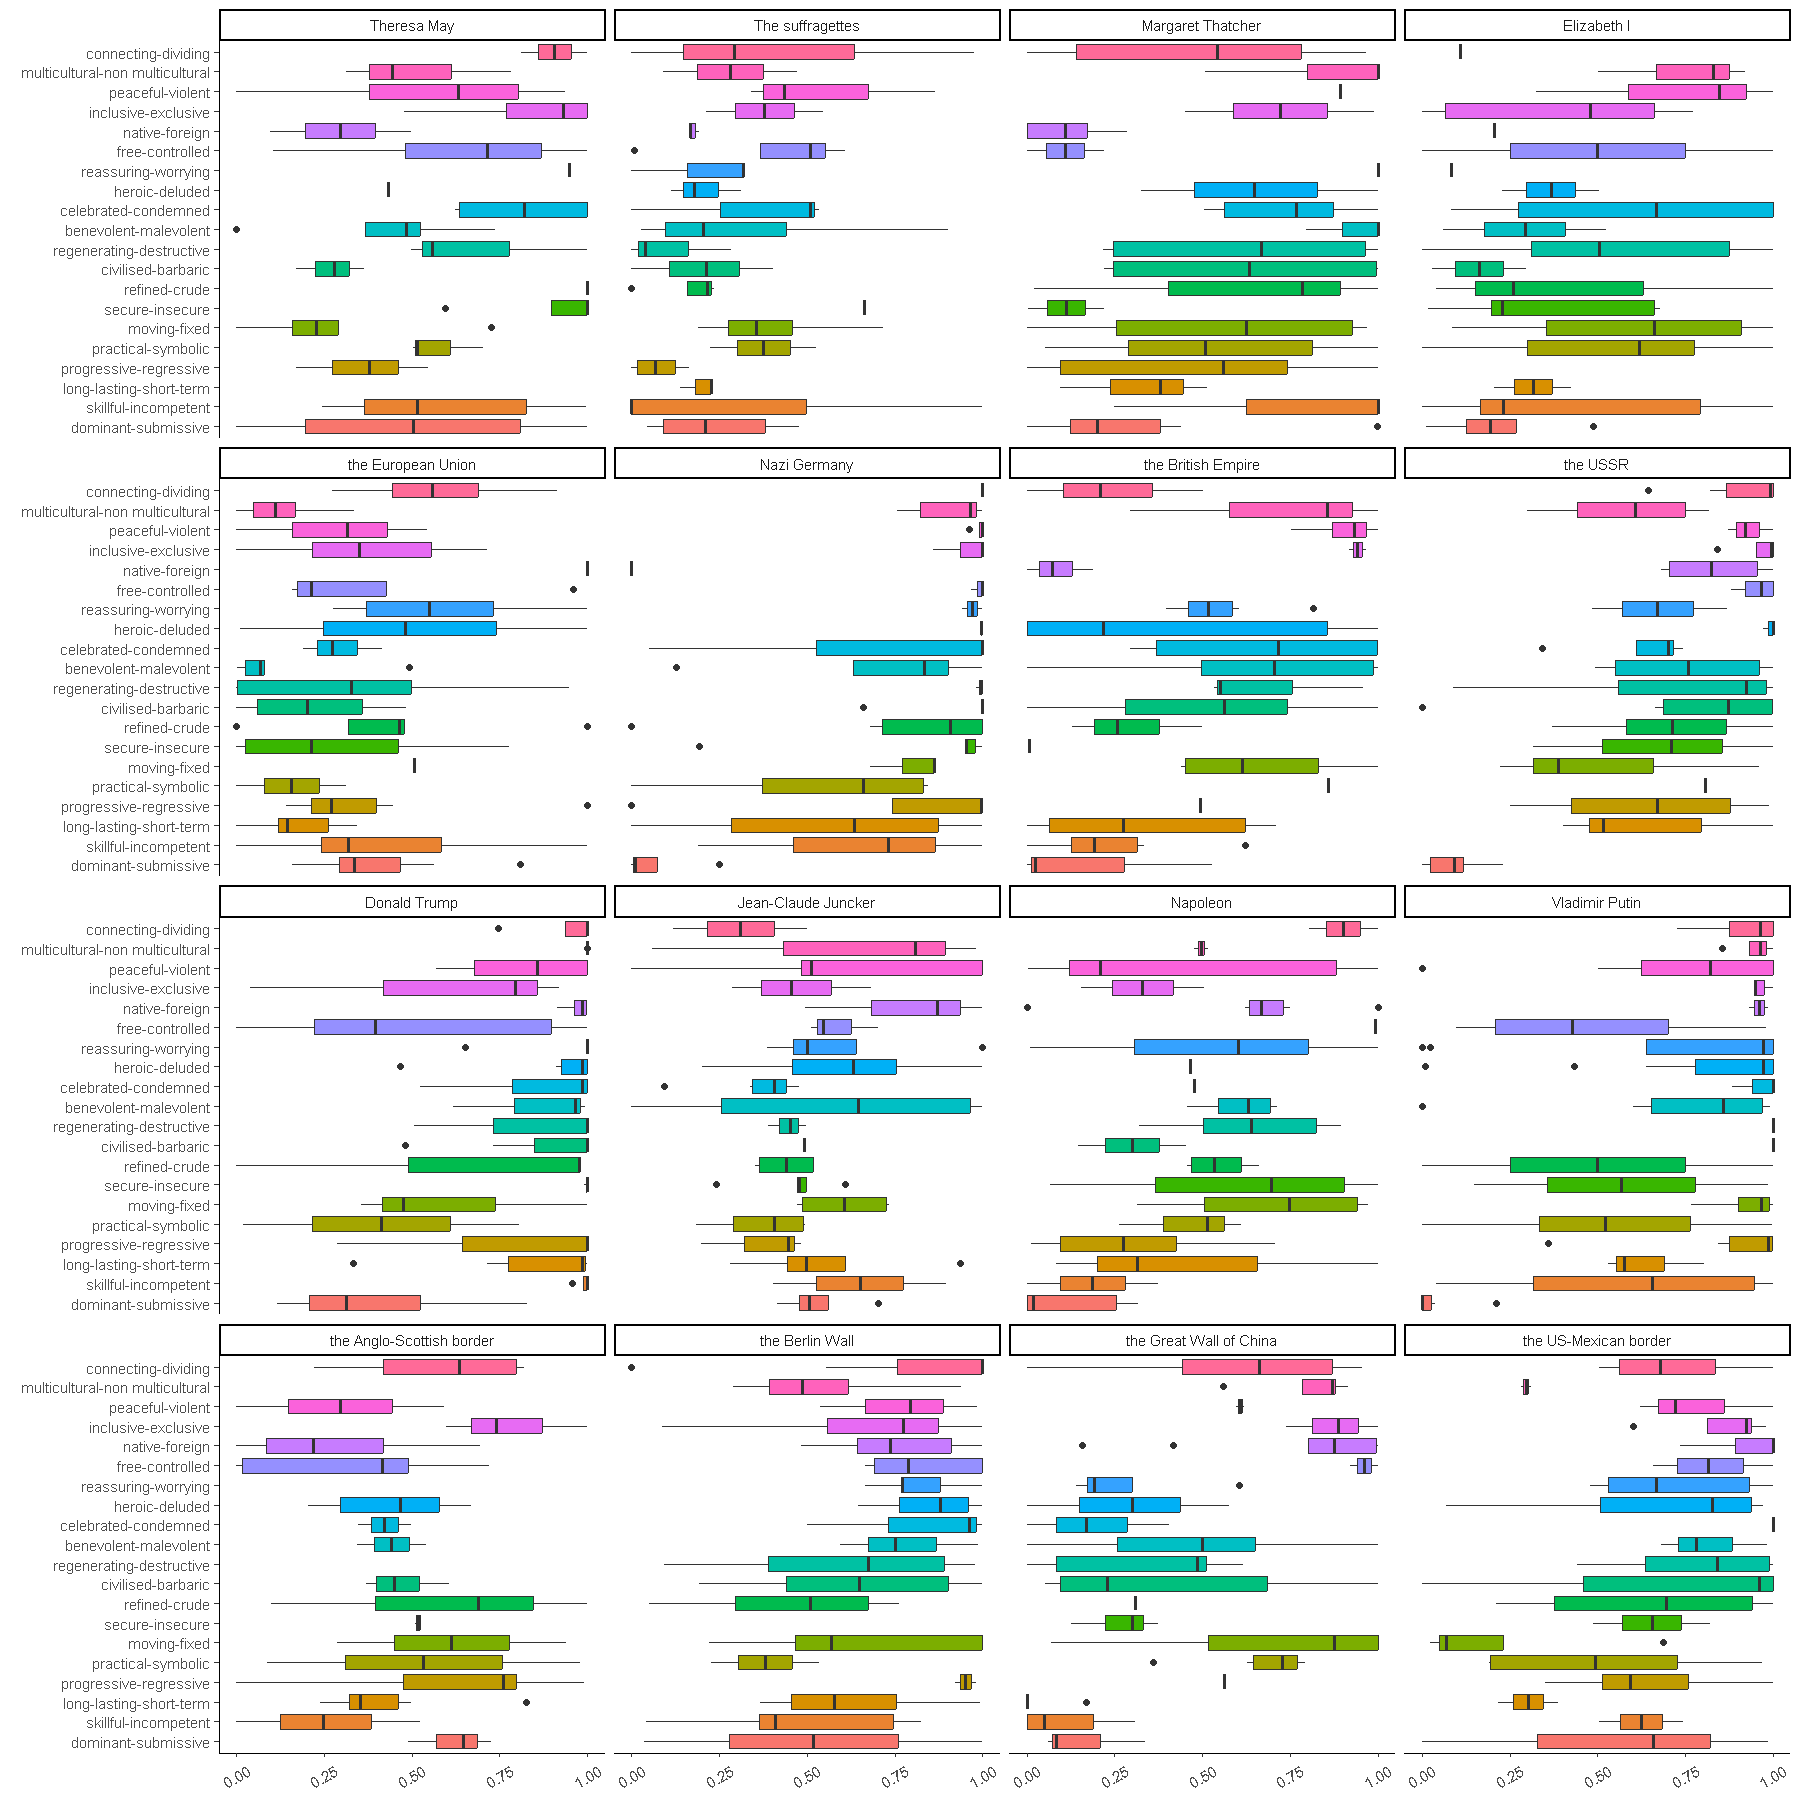

In [100]:
f2

In [129]:
ggsave(filename=here("figures","Figure2.png"), 
       plot = f2, 
       device = png, 
       width = 147.6, 
       height = 246.2, 
       units = "mm",
      dpi=300,
      scale=1.5)

In [101]:
options(repr.plot.width = 15, repr.plot.height = 15,res=300)

f3<-ggplot(d, aes(x=fullName, y=valuePast,fill=fullName)) + 
 geom_boxplot()+
 coord_flip()+
 facet_wrap(~conceptPast)+
 theme_classic()+
 theme(axis.title.x=element_blank(),
     axis.title.y=element_blank(),axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))+
             scale_fill_discrete(guide="none")

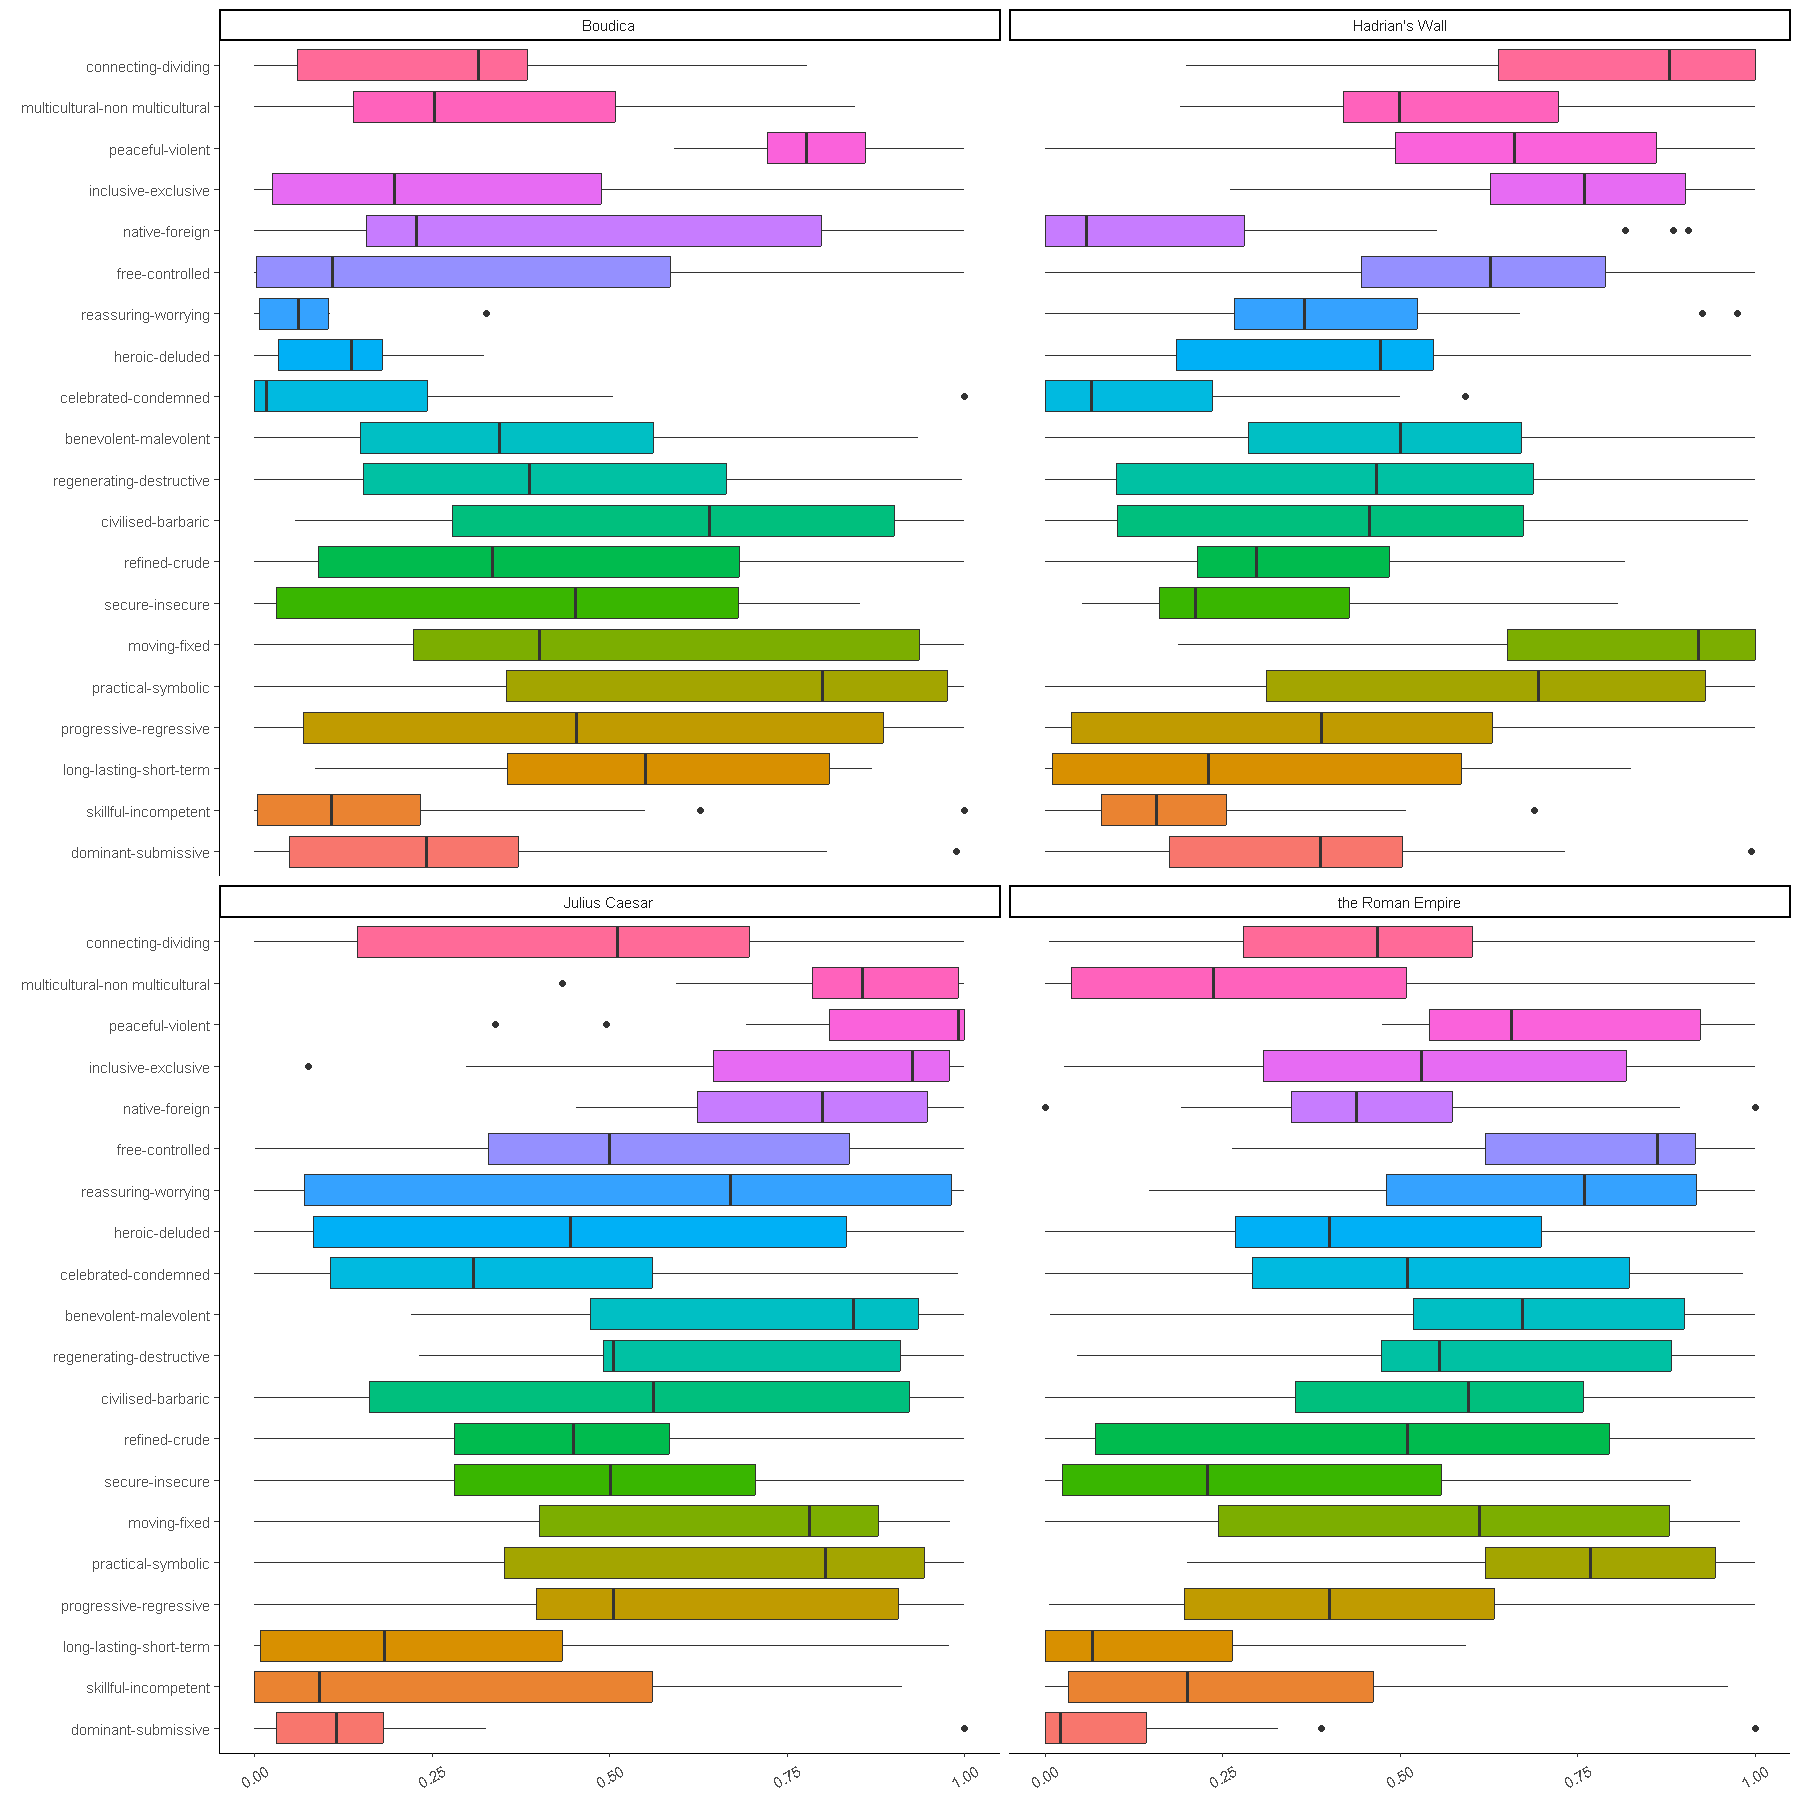

In [102]:
f3

In [135]:
ggsave(filename=here("figures","Figure3.png"), 
       plot = f3, 
       device = png, 
       width = 147.6, 
       height = 123.1, 
       units = "mm",
      dpi=300,
      scale=1.5)